# M/M/n-0 Loss System

The M/M/n loss system represents a fundamental queueing system. The steady state probabilities $x(i)$ for $i=0,...,n$ can be derived based on the analysis of Markov systems. The system consists of $n$ parallel servers, but no waiting room. Customers arrive according to a Poisson process with rate $\lambda$. The service time $B$ is exponentially distributed with mean $E[B]=1/\mu$. The M/M/n-0 system is called the *Erlang loss model*. The blocking probability $p_B = x(n)$ due to the PASTA property of the system, i.e., the probability of the state as seen by an outside random observer is the same as the probability of the state seen by an arriving customer: $x_A(i)=x(i)$. Hence, $p_B=x_A(n)=x(n)$.

## Direct computation of the blocking probability
The Erlang-B formula (or Erlang's loss formula) is
$$p_B = \frac{\frac{a^n}{n!}}{\sum_{i=0}^n\frac{a^i}{i!}}$$
with the offered load $a=\lambda E[B]=\frac{\lambda}{\mu}$. For the direct computation, the factorial needs to be computed which may lead to numerical issues.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

def erlangB_directComputation(N, a=100):
    
    def directComputation_singleValue(n,a): # computation for M/M/n system and single value of n
        k = np.arange(n+1)
        denominator = np.sum(a**k/factorial(k))
        return a**n/factorial(n) / denominator
        
    if np.isscalar(N):
        pb = directComputation_singleValue(N,a)
    else:
        pb = np.zeros_like(N, dtype=float)        
        for i,n in enumerate(N):
            pb[i] = directComputation_singleValue(n,a)            
    return pb


## Iterative computation of Erlang's loss formula
A convenient formula for the efficient computation and the avoidance of numerical issues (up to a certain point), is based on the recurrence formula.

$$
\frac{1}{B(n,a)}=1+\frac{n}{a}\frac{1}{B(n-1,a)}
$$
with the initial condition $B(0,a)=1$.
This can also be expressed as
$$
B(n,a) = \frac{aB(n-1,a)}{n+aB(n-1,a)}
$$

The blocking probability is then $p_B = B(n,a)$ for the M/M/n system with offered load $a=\lambda E[B]$.

In [2]:
#%% Iterative computation of Erlang-B for vector N
def erlangB_iterativeComputation(N, a=100):

    def iterativeComputation_singleValue(n,a): # iterative computation for single value n (M/M/n)   
        InvB = 1.0
        for j in range(1, n+1):        
            InvB = 1.0 + InvB * (j/a)                    
        return (1.0 / InvB)

    if np.isscalar(N):
            pb = iterativeComputation_singleValue(N,a)
    else:
        pb = np.zeros_like(N, dtype=float)        
        for i,n in enumerate(N):
            pb[i] = iterativeComputation_singleValue(n,a)            
    return pb

## Example 
Changing the offered load will show numerical issues with the direct computation approach, while the recurrence formula is more robust. 

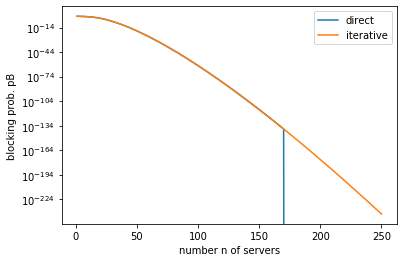

In [4]:
a = 10.5
n = np.arange(1,251)

plt.plot(n, erlangB_directComputation(n, a=a), label=f'direct')
plt.plot(n, erlangB_iterativeComputation(n, a=a), label=f'iterative')

plt.yscale('log')
plt.xlabel('number n of servers')
plt.ylabel('blocking prob. pB')    
plt.legend();